first we will import the excel file and then we will use the pandas library to read the excel file and will add a new column named 'Year' in the dataframes.



In [1]:
import pandas as pd


excel_file = pd.ExcelFile("C:/Users/yadav/OneDrive/Documents/Analytics_March2023 - V4.xlsx")

df1 = pd.read_excel(excel_file, sheet_name='Coffee 2020')
df2 = pd.read_excel(excel_file, sheet_name='Coffee 2021')
df3 = pd.read_excel(excel_file, sheet_name='Coffee 2022') 

df1['Year'] = '2020'
df2['Year'] = '2021'
df3['Year'] = '2022'



now, we will combine the three dataframes into one dataframe

In [2]:
coffee_data = pd.concat([df1, df2, df3])
coffee_data.head()

,Sr. No.,Date,Receipt No.,Farmer name,Father name,Village,Gender,Mobile no.,Membership status,Grade A - Vol. purchased in kg,...,Grade B - Total value,Grade C - Vol. purchased in kg,Grade C - Rate per kg,Grade C - Total value,Total quantity procured in kg,Total value,Payment status,Payment mode,FPC,Year
0,1,2020-06-12,4808,atul,banshi,12557,F,9841731964,Y,10,...,2004,100,150,15000,122,18914,Y,Cash,ABPCL,2020
1,2,2020-05-21,5776,heena,mahendra,12551,M,9858328735,N,39,...,24840,91,141,12831,268,45588,N,Cash,ABPCL,2020
2,3,2020-01-14,8683,liyakat,kamaldeep,12562,M,6809392530,N,5,...,24568,136,158,21488,289,47041,N,Cash,RFPCL,2020
3,4,2020-03-07,8600,pooja,deepak,12559,M,5784420341,N,7,...,5976,82,157,12874,125,20208,Y,Cash,RFPCL,2020
4,5,2020-01-29,3441,chitrangan,sandeep,12569,F,7425007890,N,13,...,21500,103,142,14626,241,38661,N,Cash,BFPACL,2020



Summarizing key information to showcase the business in the commodity in the last three years:


<Axes: xlabel='Year'>

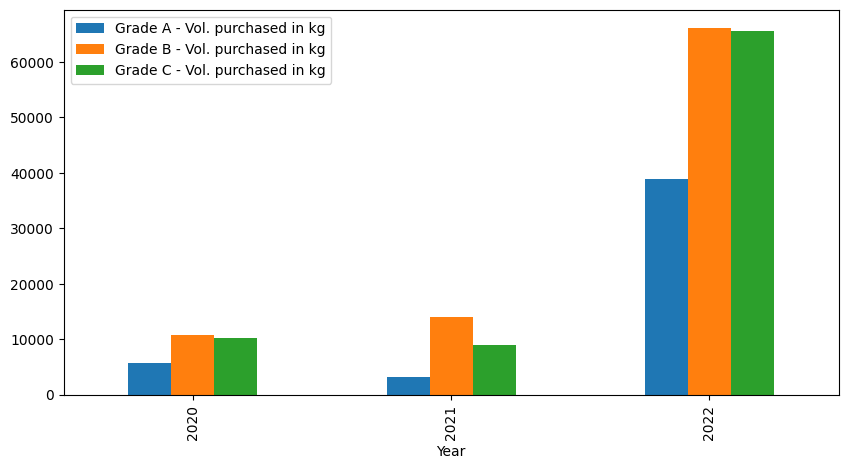

In [3]:
# Summarizing the data by year
summary_data = coffee_data.groupby('Year').agg({'Grade A - Vol. purchased in kg': 'sum', 'Grade B - Vol. purchased in kg': 'sum',
                                                           'Grade C - Vol. purchased in kg': 'sum', 'Total quantity procured in kg': 'sum','Total value': 'sum'}).reset_index()

summary_data.plot.bar(x='Year', y=['Grade A - Vol. purchased in kg', 'Grade B - Vol. purchased in kg', 'Grade C - Vol. purchased in kg',
                                  ], figsize=(10, 5))


As we can see there is a decrease in coffee sold by farmers in grade A and Grade C in 2020 to 2021, but increase of coffee sold by farmers in All the grades in 2022.


now we will Analyze the farmer profile for the crop:

To analyze the farmer profile for the crop, we will look at the number of unique farmers transacting each year and see if there is any overlap in farmers across years. We will also explore if there are any differentiating characteristics of the farmers that have transacted in more than one year.

First, let's create a dataframe that contains the unique list of farmers transacting each year:

In [4]:

farmers_2020 = set(df1['Farmer name'])
farmers_2021 = set(df2['Farmer name'])
farmers_2022 = set(df3['Farmer name'])


Next, we can find the number of unique farmers transacting each year:

Number of unique farmers transacting in 2020:  116
Number of unique farmers transacting in 2021:  254
Number of unique farmers transacting in 2022:  412


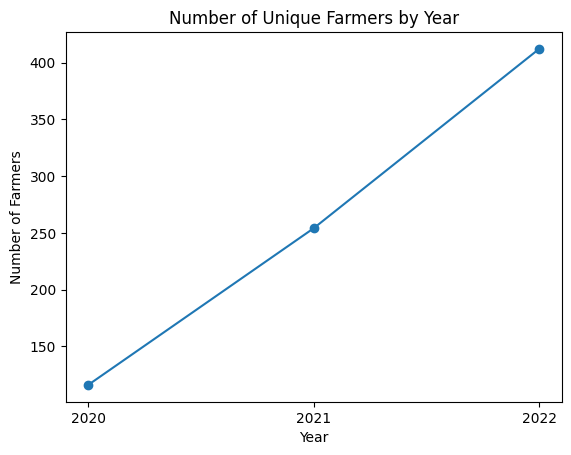

In [6]:
import matplotlib.pyplot as plt

num_farmers_2020 = len(farmers_2020)
num_farmers_2021 = len(farmers_2021)
num_farmers_2022 = len(farmers_2022)

print("Number of unique farmers transacting in 2020: ", num_farmers_2020)
print("Number of unique farmers transacting in 2021: ", num_farmers_2021)
print("Number of unique farmers transacting in 2022: ", num_farmers_2022)

x = ['2020', '2021', '2022']
y = [num_farmers_2020, num_farmers_2021, num_farmers_2022]

plt.plot(x, y, marker='o')

plt.title('Number of Unique Farmers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Farmers')

plt.show()




We can see that the number of unique farmers transacting has increased each year, indicating that more farmers are being included in the procurement process.

Now, let's check if there is any overlap in farmers transacting across years:

Number of farmers transacting in both 2020 and 2021:  52
Number of farmers transacting in both 2021 and 2022:  112
Number of farmers transacting in both 2020 and 2022:  59


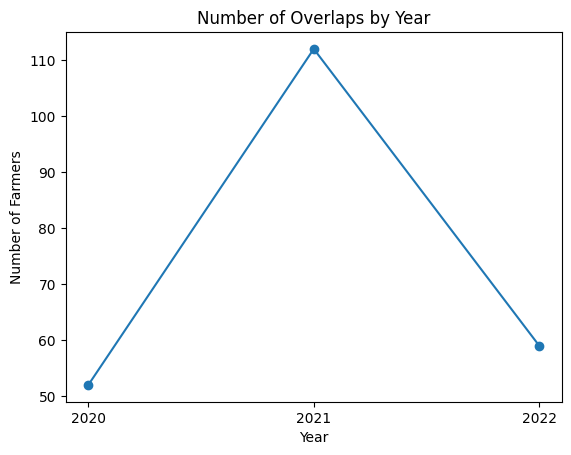

In [7]:
# overlap in farmers transacting across years
overlap_2020_2021 = farmers_2020.intersection(farmers_2021)
overlap_2021_2022 = farmers_2021.intersection(farmers_2022)
overlap_2020_2022 = farmers_2020.intersection(farmers_2022)

print("Number of farmers transacting in both 2020 and 2021: ", len(overlap_2020_2021))
print("Number of farmers transacting in both 2021 and 2022: ", len(overlap_2021_2022))
print("Number of farmers transacting in both 2020 and 2022: ", len(overlap_2020_2022))

x = ['2020', '2021', '2022']
y = [len(overlap_2020_2021), len(overlap_2021_2022), len(overlap_2020_2022)]

plt.plot(x, y, marker='o')

plt.title('Number of Overlaps by Year')
plt.xlabel('Year')
plt.ylabel('Number of Farmers')

plt.show()

To further analyze the farmer profile, we can explore the characteristics of farmers who have transacted in more than one year. We can use the pandas groupby method to group the data by the farmers' mobile number and count the number of unique years that they have transacted.

In [8]:
farmer_years = coffee_data.groupby('Mobile no. ').agg({'Year': 'nunique'}).reset_index()


We can then plot a histogram of the number of years each farmer has transacted to get an idea of the distribution.

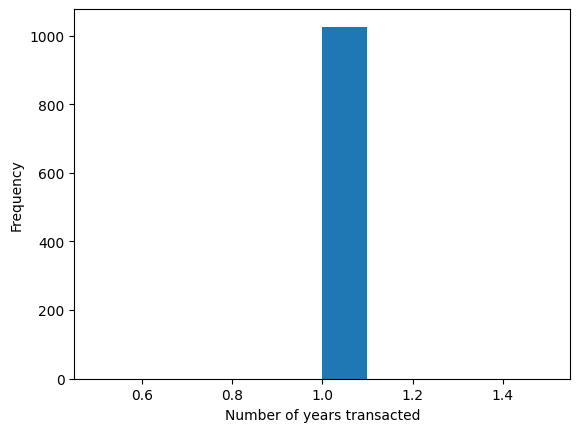

In [9]:
import matplotlib.pyplot as plt

plt.hist(farmer_years['Year'])
plt.xlabel('Number of years transacted')
plt.ylabel('Frequency')
plt.show()


The resulting plot shows that the majority of farmers have transacted for only one year, while a small percentage have transacted for two or three years.

To explore any differentiating characteristics of farmers who have transacted in more than one year, we can compare their characteristics to those of farmers who have transacted for only one year. We can create a new column in the farmer_years dataframe to indicate whether each farmer has transacted for multiple years.

In [10]:
farmer_years['Multiple years'] = farmer_years['Year'] > 1


We can then join this dataframe with the original df dataframe to get the characteristics of each farmer, and group the data by the Multiple years column to compare the characteristics of farmers who have transacted for multiple years to those who have transacted for only one year.

In [11]:
# Join the farmer_years dataframe with the original dataframe to get the characteristics of each farmer
farmer_characteristics = pd.merge(coffee_data, farmer_years, on='Mobile no. ')

# Group the data by the 'Multiple years' column to compare the characteristics of farmers who have transacted for multiple years to those who have transacted for only one year
grouped = farmer_characteristics.groupby('Multiple years').agg({'Grade A - Vol. purchased in kg': 'mean',
                                                                'Grade A - Rate per kg': 'mean',
                                                                'Grade A - Total value': 'mean',
                                                                'Total quantity procured in kg': 'mean',
                                                                'Total value': 'mean'})

grouped

,Grade A - Vol. purchased in kg,Grade A - Rate per kg,Grade A - Total value,Total quantity procured in kg,Total value
Multiple years,,,,,
False,46.546784,207.494152,9780.519493,217.716374,37860.659844
